In [1]:
%pip install diagrams cairosvg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.5/875.5 KB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cairocffi: filename=cairocffi-1.5.0-py3-none-any.whl size=90538 sha256=6993ea2570406e00aa749254a35c6597ce85c936b48ea4cc49866a09bc6a22b6
  Stored in directory: /root/.cache/pip/wheels/34/c0/21/58ab88c0e5a36a32f10f5257afbd6e5fae805171da13691863
Successfully built cairocffi


In [2]:
import base64
from functools import partial
from io import StringIO
from pathlib import Path
from urllib.request import urlretrieve

import cairosvg


def svg2png(source, output_path):
    func = partial(
        cairosvg.svg2png,
        write_to=output_path,
        output_height=128,
        output_width=128,
    )

    if isinstance(source, str):
        return func(url=source)
    else:
        return func(source)


def download(url, output_path):
    urlretrieve(url, output_path)


Path("resources/").mkdir(parents=True, exist_ok=True)
fivetran_b64 = "PHN2ZyB3aWR0aD0iMTMwIiBoZWlnaHQ9IjE4MSIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIj48cGF0aCBkPSJNODkuNyA5MC4zaDE4LjFjMS41IDAgMi42LTEuMiAyLjYtMi42IDAtLjMtLjEtLjYtLjItLjlMNzkgMS44Qzc4LjYuOCA3Ny42LjEgNzYuNS4xaC0xOGMtMS41IDAtMi42IDEuMi0yLjYgMi42IDAgLjMuMS42LjIuOWwzMS4yIDg1Yy40IDEgMS4zIDEuNyAyLjQgMS43em0tMy4yIDkwLjJoMTguMWMxLjUgMCAyLjYtMS4yIDIuNi0yLjcgMC0uMy0uMS0uNi0uMi0uOEw0Mi43IDEuN0M0Mi4zLjcgNDEuMyAwIDQwLjIgMEgyMi4xYy0xLjUgMC0yLjYgMS4yLTIuNiAyLjYgMCAuMy4xLjYuMi45TDg0IDE3OC44Yy40IDEgMS40IDEuNyAyLjUgMS43em0tMzUuNyAwaDE4LjFjMS41IDAgMi42LTEuMiAyLjYtMi42IDAtLjMtLjEtLjYtLjItLjlMNDAuMiA5MmMtLjQtMS0xLjQtMS43LTIuNS0xLjdIMTkuNmMtMS41IDAtMi42IDEuMi0yLjYgMi42IDAgLjMuMS42LjIuOWwzMS4yIDg1Yy4zIDEgMS4zIDEuNyAyLjQgMS43em00MS4xLTE3N2wxNC42IDM5LjljLjQgMSAxLjQgMS43IDIuNSAxLjdoMTguMWMxLjUgMCAyLjYtMS4yIDIuNi0yLjYgMC0uMy0uMS0uNi0uMi0uOUwxMTUgMS43Yy0uNC0xLTEuNC0xLjctMi41LTEuN0g5NC40Yy0xLjUgMC0yLjYgMS4yLTIuNiAyLjYgMCAuMyAwIC43LjEuOXptLTc0LjYgMTc3aDE4LjFjMS41IDAgMi42LTEuMiAyLjYtMi42IDAtLjMtLjEtLjYtLjItLjlsLTE0LjYtMzkuOWMtLjQtMS0xLjQtMS43LTIuNS0xLjdIMi42Yy0xLjUgMC0yLjYgMS4yLTIuNiAyLjYgMCAuMy4xLjYuMi45bDE0LjYgMzkuOWMuNCAxIDEuNCAxLjcgMi41IDEuN3oiIGZpbGw9IiMwMDdGRkYiLz48L3N2Zz4=".encode("ascii")
fivetran_icon = base64.b64decode(fivetran_b64)
svg2png(fivetran_icon, output_path="resources/fivetran.png")

download("https://lh3.googleusercontent.com/tQfGrHF0EktOqP5rHQxO7mbX_62dS2vYdE-D2X6eQXRvEX8xmMfXnKsfVGjesjbRXWkC4GcCBYC5Gi-VXg_p=w128-h128", "resources/dlp.png")

In [3]:
from diagrams import Cluster, Diagram, Edge
from diagrams.aws.compute import EC2
from diagrams.azure.compute import VM
from diagrams.custom import Custom
from diagrams.gcp.analytics import (
    BigQuery, Composer, DataCatalog, Dataflow, PubSub
)
from diagrams.gcp.compute import ComputeEngine, Functions
from diagrams.gcp.ml import AIHub
from diagrams.gcp.network import PartnerInterconnect
from diagrams.gcp.storage import Storage
from diagrams.onprem.analytics import Dbt, Tableau
from diagrams.onprem.compute import Server


graph_attr = {
    "bgcolor": "transparent",
    "pad": ".25",
}

with Diagram(
    "Grupo Boticário: Architectural Diagram",
    filename="case",  # it appends extension automagically
    show=False,
    graph_attr=graph_attr,
) as diag:
    with Cluster("Data Sources"):
        ds = [
            Server("on-premises"),
            EC2("aws services"),
            VM("azure services"),
        ]

    with Cluster("Google Cloud"):
        di = PartnerInterconnect("partner interconnect")

        with Cluster("Extraction"):
            fivetran = Custom("fivetran", "resources/fivetran.png")
            wh = Functions("webhooks")
            psub = PubSub("event bus")
            df = Dataflow("dataflow")

            psub >> df

        with Cluster("Data Lake"):
            dl = Storage("cloud storage")
        
        with Cluster("Data Warehouse"):
            bq = BigQuery("bigquery")
            dbt = Dbt("dbt")

            bq >> dbt
            dbt >> bq

        with Cluster("Data Consumption"):
            bi = Tableau("bi/analytics")
            http = Functions("ml http")

            cons = [bi, http]

        with Cluster("Data Governance"):
            dlp = Custom("dlp", "resources/dlp.png")
            dc = DataCatalog("data catalog")

        with Cluster("Orchestration"):
            airflow = Composer("airflow")

    ds >> di >> [fivetran, wh, psub]
    [df, wh, fivetran] >> dl >> bq >> cons

    # adjust positioning with invisible edges
    dlp >> Edge(style="invis") >> bq
    dc >> Edge(style="invis") >> airflow

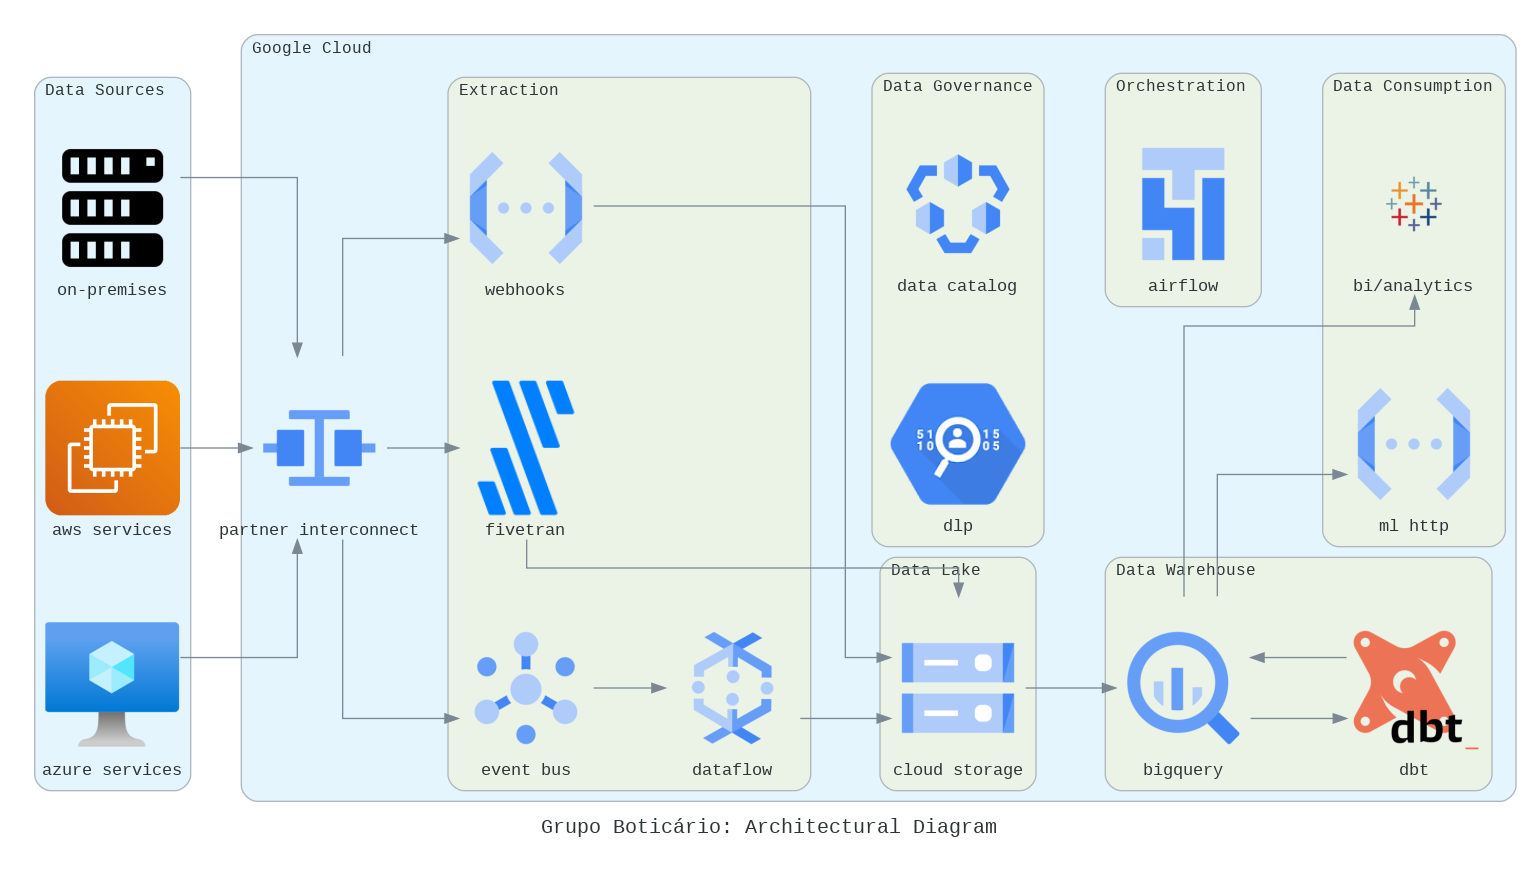

In [4]:
diag